# I - Préparation du DataFrame

### 1 - Import des bibilothèques

In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

### 2 - Import des données dans un DataFrame

In [108]:
df = pd.read_csv('https://raw.githubusercontent.com/StephaneDurig/Demoday_Essential/main/Life%20Expectancy%20Data.csv')

### 3 - Connaitre son DataFrame

In [109]:
# Le nombre de lignes et de colonnes
print('Le nombre de lignes, colonnes est de ', format(df.shape))

Le nombre de lignes, colonnes est de  (2938, 22)


In [110]:
# Les premières lignes du DataFrame
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [111]:
# Le nombre de lignes vides par colonnes
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [112]:
# affiche les différents indicateurs

## Sur la totalité du DataFrame 
df.describe(include='all')

## Ou sur une colonne en particulier
df['Life expectancy '].describe()


count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

### 4 - Modifications des Données

#### 4.1 -  Modifications

##### 1° Preprocessing

In [113]:
# Suppression de colonnes

## Suppression de la colonne 'Population'
df=df.drop('Population',1) # le 1 correspond à la selection de la colonne complète

# Modifications des lignes vides

## Modification des lignes vides par la valeur de la médiane regroupée par Pays
for i in df.columns[4:-1]:
    df[i] = df.groupby('Country')[i].fillna(df.groupby('Country')[i].transform('median'))

# Supprime toutes les lignes où il y a une données manquante
df=df.dropna(axis=0)



C:\Users\capit\AppData\Local\Temp\ipykernel_12164\2564388415.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('Population',1) # le 1 correspond à la selection de la colonne complète


In [ ]:
# Le nombre de lignes et de colonnes
print('Le nombre de lignes, colonnes est de ', format(df.shape))

#### 4.2 -  Contrôle

In [114]:
# Vérification du nombre de cellules vides par colonnes
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# II - Préparation de l'Analyse

### 1 - Prétraitement

In [115]:
# Séparation du Dataset en deux parties
## Les colonnes de caractéristiques : 'X'
## La colonne de données que l'on veut prédire : 'y' 

print("Séparation des Données cibles / Caractéristiques...")

## Choisissez les colonnes que vous voulez en caractéristiques
features_list=['Adult Mortality',
               'infant deaths',
               'Alcohol',
               'percentage expenditure',
               'Hepatitis B',
               'Measles ',
               ' BMI ',
               'under-five deaths ',
               'Polio',
               'Total expenditure',
               'Diphtheria ',
               ' HIV/AIDS',
               'GDP',
               ' thinness  1-19 years',
               ' thinness 5-9 years',
               'Income composition of resources',
               'Schooling'
               ]

X = df.loc[:,features_list] # Nous ajoutons la liste 'features_list' à notre 'loc' 
y = df.iloc[:, 3].astype(float) # Nous définissons  '---' comme étant la variable cible (celle à prédire)

print("...Fait.")
print()

Séparation des Données cibles / Caractéristiques...
...Fait.



In [116]:
# Encodage des données catégorielles & Normalisation des données numériques
# !!! LES NOMS DES COLONNES NE PORTENT SUR LE JEU DE DONNEES 'X_train' !!!

#print("#### X_train AVANT le prétraitement ####")
#print(X_train.head(5))

print("Encodage des données catégorielles & Normalisation des données numériques...")
print()
## StandardScaler pour normaliser les données(i.e appliquer Z-score)

# Partie données Numériques 
scaler = StandardScaler()
X = scaler.fit_transform(X)

Encodage des données catégorielles & Normalisation des données numériques...



In [117]:
# Séparation en deux Dataset : Entrainement ('Train') & Test ('Test')
print("Séparation du Dataset en un set d'entrainement et un set de test...")

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,  # ici le set de test fait 20 % du Total
                                                    random_state=0) # une séquence de nombre aléatoire (mais reproductible) 
print("...Fait.") 

Séparation du Dataset en un set d'entrainement et un set de test...
...Fait.


In [118]:
type(X_train)

numpy.ndarray

### 2 - Construction du modèle

Il existe plusieurs types de modèles d'entrainement:
- regressor = LinearRegression()            --> 'Régression Linéaire Simple'
- classifier = LogisticRegression()         --> 'Régression Minéaire Multiple'  
- classifier = DecisionTreeClassifier       --> 'Arbre de Décision'  
- classifier = RandomForestClassifier         --> 'Forêt aléatoire'

Accuracy sur le train set : 0.8285460070307811
Accuracy sur le test set : 0.8240634442697033
Intercept : 68.84276015232544
Coefficients : [ -2.18506691  12.06600292  -0.02452956   0.46738624  -0.06406361
  -0.16615004   0.77900971 -12.02595379   0.53889247   0.05561281
   0.68901797  -2.62335099   0.40591755  -0.35356044  -0.07939653
   1.33520373   2.78675011]


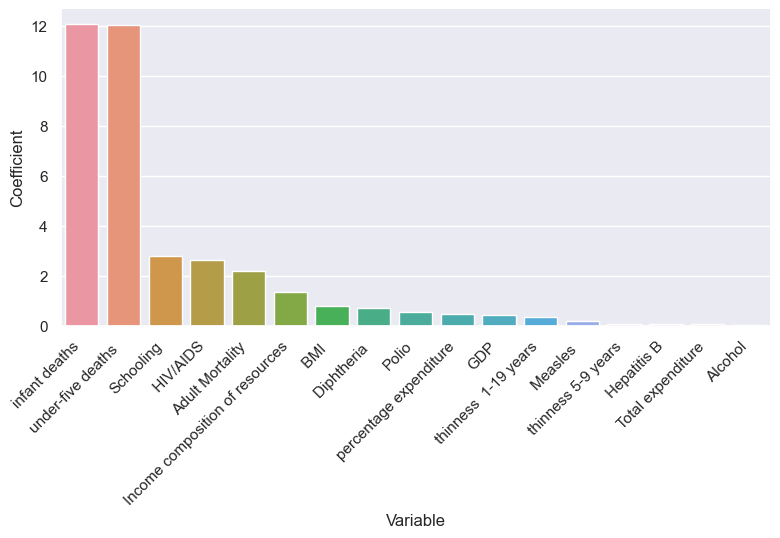

In [119]:
# Créer le modèle de régression linéaire
regressor = LinearRegression()

# Test du modèle d'entrainement
regressor.fit(X_train, y_train)

# Évaluer le modèle sur les données de test
score_train = regressor.score(X_train, y_train)
print("Accuracy sur le train set :", score_train)
score_test = regressor.score(X_test, y_test)
print("Accuracy sur le test set :", score_test)

# Faire des prédictions sur le train set et le test set
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Afficher les coefficients et l'intercept
print("Intercept :", regressor.intercept_)
print("Coefficients :", regressor.coef_)

# Créer un DataFrame avec les variables prédictives et leurs coefficients
feature_importance = pd.DataFrame({
                    #'Variable': df.iloc[:, 4:].columns, 
                    'Variable': df.loc[:, features_list].columns, 
                    'Coefficient': regressor.coef_.ravel()
})
feature_importance['Coefficient'] = feature_importance['Coefficient'].abs() # donne les valeurs absolues



# Afficher les coefficients dans un graphique
g = sns.catplot(data=feature_importance.sort_values(by='Coefficient', ascending = False), 
            y='Coefficient', 
            x='Variable', 
            kind='bar', 
            height=4,
            aspect=2)
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [120]:
# calculer la matrice de corrélation
#print("'" + df.iloc[:,3].name + "'")
Liste_Correlation=list(features_list)
Liste_Correlation.append('Life expectancy ')

corr = df[Liste_Correlation].corr()

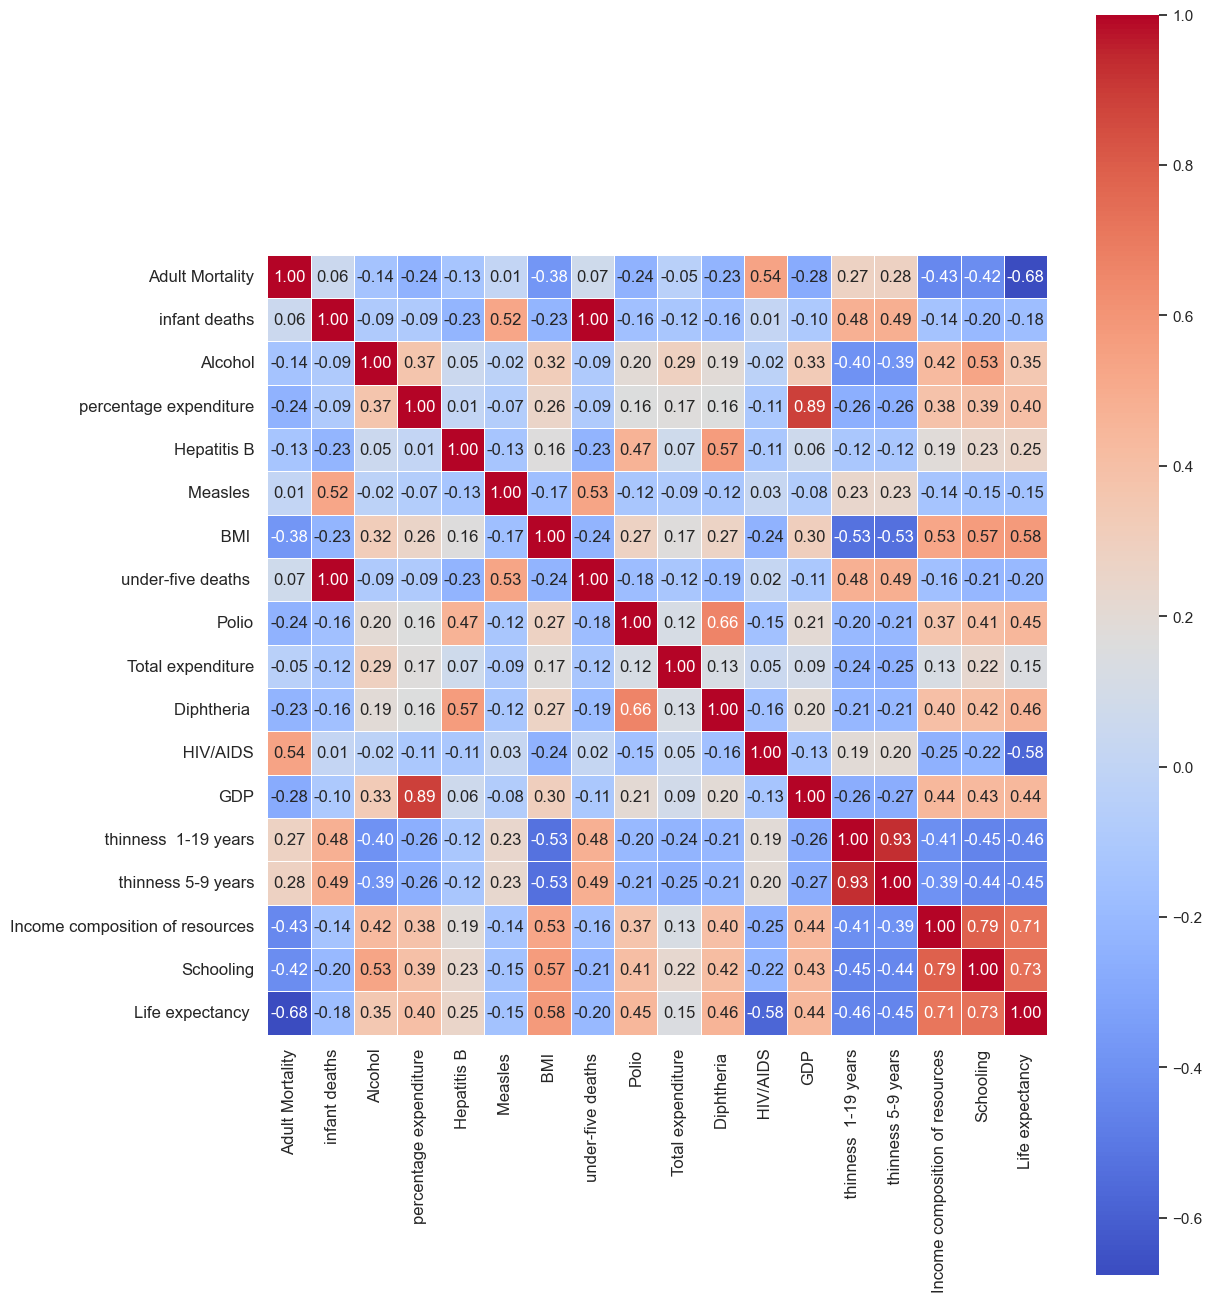

In [121]:
# Définir la taille de la figure
plt.figure(figsize=(15, 20))

# créer la visualisation
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True, linewidths=0.5)

# ajuster la taille des carrés et la taille de la police
plt.yticks(rotation=0, fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.subplots_adjust(left=0.25, bottom=0.25) # ajuster la taille des carrés

# afficher le carré de corrélation
plt.show()